# 2. 様々なクラスタリング

## 2.1 SpectralClustering でクラスタリング

データ密度でクラスタを作成するため、円心円状になっていないデータも、うまくクラスタリングが可能

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import cluster, preprocessing
from sklearn import datasets
%matplotlib inline

X, z = datasets.make_moons(n_samples=200, noise=0.05, random_state=0)
sc = preprocessing.StandardScaler()
X_norm = sc.fit_transform(X)
display(X_norm[0:5])
print()
display(z[0:5])

array([[ 0.36748451,  0.54576641],
       [ 1.28731953, -1.2803031 ],
       [-0.59397643,  0.04357482],
       [-1.74182239, -0.66371706],
       [ 1.45705144, -0.85667812]])

array([0, 1, 1, 0, 1])

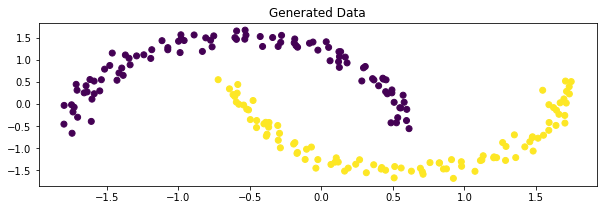

In [47]:
x = X_norm[:, 0]
y = X_norm[:, 1]
plt.figure(figsize=(10, 3))
plt.scatter(x, y, c=z)
plt.title('Generated Data')
plt.show()

[[ 0.72761175 -0.78502906]
 [-0.74231098  0.80088824]]


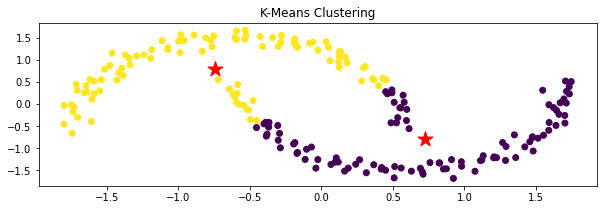

In [48]:
km = cluster.KMeans(n_clusters=2)
z_km = km.fit(X_norm)

plt.figure(figsize=(10, 3))
plt.scatter(x, y, c=z_km.labels_)
print(z_km.cluster_centers_)
plt.scatter(z_km.cluster_centers_[:, 0], z_km.cluster_centers_[:, 1], c='red', marker='*', s=250)
plt.title('K-Means Clustering')
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:261: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  "Graph is not fully connected, spectral embedding may not work as expected."


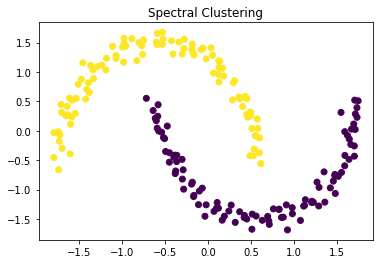

In [49]:
spc = cluster.SpectralClustering(n_clusters=2, affinity='nearest_neighbors')
z_spc = spc.fit(X_norm)
# print(z_spc.affinity_matrix_)

plt.scatter(x, y, c=z_spc.labels_)
# plt.scatter(z_spc.cluster_centers_[:, 0], z_spc.cluster_centers_[:, 1], s=250, marker='*', c='red')
plt.title('Spectral Clustering')
plt.show()

SpectralClusteringにより綺麗に分けることができている

Affinity(親和性)は、クラスタリングを実施する際に作成するグラフ行列の作成方法を指定する

グラフ行列とは、データがそれぞれどのようにつながっているかを示す行列で、どのようにつながっているかを定義するのがaffinityになる。今回は、`nearest_neighbors`を使用している

## 2.2 MeanShiftを使ったクラスタリング

`MeanShift`はクラスタすうがわからない場合に、データをクラスタに分類する手法

複数のGぶんぷ(正規分布)を仮定して、各データがどのガウス分布に所属するかを決定し、クラスタ分析をする

ここでもk-meansとMeanShiftの結果を比較しながらそれぞれの特徴を確かめていく

In [50]:
df_wine_all = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',
    header=None)
display(df_wine_all)
df_wine = df_wine_all[[0, 10, 13]]
df_wine.columns = [u'class', u'color', u'proline']
pd.DataFrame(df_wine)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


,class,color,proline
0,1,5.64,1065
1,1,4.38,1050
2,1,5.68,1185
3,1,7.80,1480
4,1,4.32,735
...,...,...,...
173,3,7.70,740
174,3,7.30,750
175,3,10.20,835
176,3,9.30,840


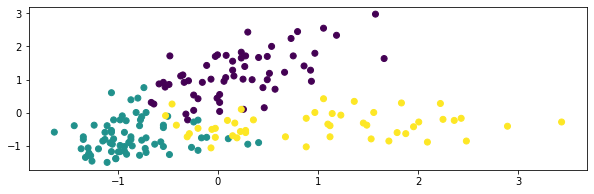

In [51]:
X = df_wine[['color', 'proline']]
sc = preprocessing.StandardScaler()
X_norm = sc.fit_transform(X)
x = X_norm[:, 0]
y = X_norm[:, 1]
z = df_wine['class']

plt.figure(figsize=(10, 3))
plt.scatter(x, y, c=z)
plt.show()

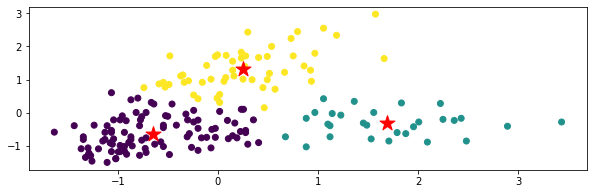

In [52]:
# K-meansを試す
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
z_km = km.fit(X_norm)
x = X_norm[:, 0]
y = X_norm[:, 1]

plt.figure(figsize=(10, 3))
plt.scatter(x, y, c=z_km.labels_)
plt.scatter(z_km.cluster_centers_[:, 0], z_km.cluster_centers_[:, 1], s=250, c='red', marker='*')
plt.show()

K-Means法では、中心から円心円状に広がって分類される

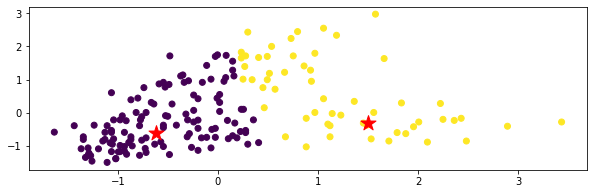

In [53]:
# MeanShift を試す

from sklearn.cluster import MeanShift
ms = MeanShift(seeds=X_norm)
z_ms = ms.fit(X_norm)

x = X_norm[:, 0]
y = X_norm[:, 1]

plt.figure(figsize=(10, 3))
plt.scatter(x, y, c=z_ms.labels_)
plt.scatter(z_ms.cluster_centers_[:, 0], z_ms.cluster_centers_[:, 1], s=250, c='red', marker='*')
plt.show()


2つに分類された。MeanShiftではクラスタ数を指定することなくクラスタリングが可能(パラメータはseeds(乱数シード)のみを指定)

MeanShiftは、K-Meansをベースとして、近いクラスターをまとめていく

## 2.3 x-meansで非階層型のクラスタリングを実施

x-meansについても、自動でクラスタ数を指定してくれる手法

x-meansは、k-meansのアルゴリズムに加えて、あるクラスタが正規分布2つで表されるのと1つで表せれるのとでは、どちらが適切かを判定して、2つが適切な場合はクラスタを2つに分けるというアルゴリズム

In [54]:
!pip install pyclustering

<function matplotlib.pyplot.show>

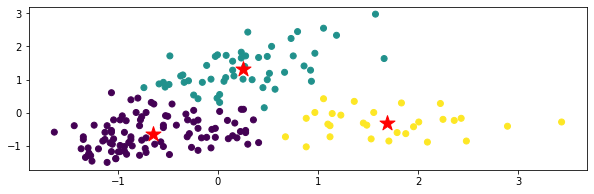

In [56]:
from pyclustering.cluster.xmeans import xmeans
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer

xm_c = kmeans_plusplus_initializer(X_norm, 2).initialize()
xm_i = xmeans(data=X_norm, initial_centers=xm_c, kmax=20, ccore=True)
xm_i.process()

z_xm = np.ones(X_norm.shape[0])
for k in range(len(xm_i._xmeans__clusters)):
    z_xm[xm_i._xmeans__clusters[k]] = k+1
plt.figure(figsize=(10,3))
plt.scatter(x,y, c=z_xm)
centers = np.array(xm_i._xmeans__centers)
plt.scatter(centers[:,0],centers[:,1],s=250, marker="*",c="red")
plt.show

## 2.4 GMMでクラスタリングを実施

混合ガウスモデル(GMM: Gaussian Mixture Model)を使ったクラスタリングを実施

GMMは各データがどのガウス分布に所属している確率が最も高いかを求めてラベリングする

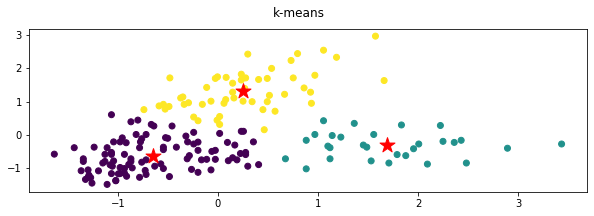

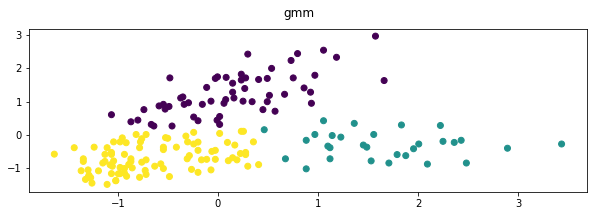

In [62]:
plt.figure(figsize=(10, 3))
plt.scatter(x, y, c=z_km.labels_)
plt.scatter(z_km.cluster_centers_[:, 0], z_km.cluster_centers_[:, 1], s=250, c='red', marker='*')
plt.suptitle('k-means')
plt.show()

from sklearn import mixture
gmm = mixture.GaussianMixture(n_components=3, covariance_type='full')
z_gmm = gmm.fit(X_norm)
z_gmm = z_gmm.predict(X_norm)

plt.figure(figsize=(10, 3))
plt.scatter(x, y, c=z_gmm)
plt.suptitle('gmm')
plt.show()


K-MeansとGMMの結果はほぼ同様だが、大きく異なる点は2つ

- k-meansの円心円状での分類に対して、GMMは傾いた楕円形の分類
- ガウス分析を仮定するので、各データがどのクラスタに所属するのか確立を求めることが可能

## 2.5 VBGMM でクラスタリングを実施

変分混合ガウスモデル(VBGMM: Variational Bayesian Gaussian Mixture)

VBGMMはクラスタ数がわからない場合に有用な手法

複数のガウス分布を仮定して、各データがどのG分布に所属するかを決定して、クラスタ分析する。MeanShiftとは異なり、ベイズ推定に基づいて確率分布を計算しながら分布の形状を求める

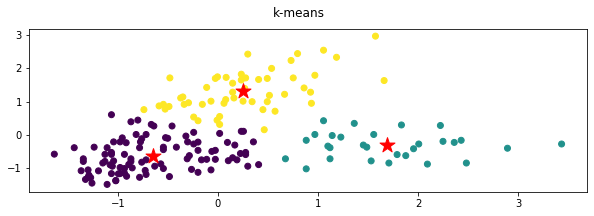

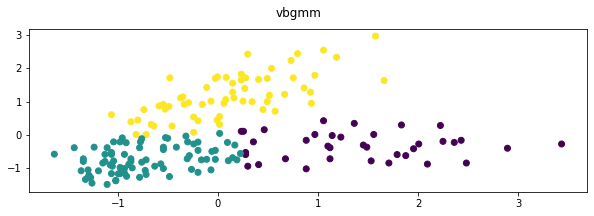

In [67]:
plt.figure(figsize=(10, 3))
plt.scatter(x, y, c=z_km.labels_)
plt.scatter(z_km.cluster_centers_[:, 0], z_km.cluster_centers_[:, 1], s=250, c='red', marker='*')
plt.suptitle('k-means')
plt.show()

from sklearn import mixture
# n_components=10として、上限のクラスタ数を10に設定
vbgmm = mixture.BayesianGaussianMixture(n_components=10, random_state=0)
vbgmm = vbgmm.fit(X_norm)
labels = vbgmm.predict(X_norm)

plt.figure(figsize=(10, 3))
plt.scatter(x, y, c=labels)
plt.suptitle('vbgmm')
plt.show()

## 2.6 VBGMMで最適なクラスタ数を探索